

# The Business problem
#### Problem statement
Breast cancer is one of the most common types of cancer among women worldwide. Early and accurate diagnosis is crucial to increase the chances of effective treatment and recovery. However, manual analysis of imaging tests can be time-consuming and prone to human error. Therefore, there is a growing need to develop automated systems that can assist doctors in detecting and classifying breast lesions.

#### Objective
To develop a machine learning model that can automatically classify whether a breast tissue sample obtained through fine needle aspiration (FNA) is benign or malignant based on features extracted from cell nucleus images. This model will help speed up the diagnostic process and improve accuracy, providing a reliable second opinion for doctors.

### Dataset
The dataset used is the "Breast Cancer Wisconsin (Diagnostic)" available on the UCI Machine Learning Repository. It contains 569 samples with 30 features extracted from cell nucleus images, as well as the diagnosis (benign or malignant).

#### Attributes of the dataset
1. ID number: Sample identification
2. Diagnosis: Diagnosis (M = malignant, B = benign)
3. Ten real-valued features computed for each cell nucleus, including:
4. Radius (mean of distances from center to points on the perimeter)
5. Texture (standard deviation of gray-scale values)
6. Perimeter
7. Area
8. Smoothness (local variation in radius lengths)
9. Compactness (perimeter^2 / area - 1.0)
10. Concavity (severity of concave portions of the contour)
11. Concave points (number of concave portions of the contour)
12. Symmetry
13. Fractal dimension (coastline approximation - 1)

The features include the mean, standard error, and the "worst" or largest (mean of the three largest values) of these features for each image, resulting in 30 variables in total.

### Steps Involved
1. **Data Exploration:** Exploratory data analysis to understand the distribution of features and their correlations.

2. **Data Preprocessing:** Handling missing values (if any), normalization/standardization of features, and splitting the 
data into training and testing sets.

3. **Model Selection:** The Logistic Regression algorithm is used to classify the dataset.

4. **Training and Validation:** Training the models using cross-validation to ensure robustness and generalization.

5. **Evaluation:** Since it is a classification problem, Evaluation of the models is done using metrics such as accuracy, precision, recall, F1-score, and the area under the ROC curve (AUC).

### Conclusion
Developing a machine learning model for breast cancer diagnosis from features extracted from cell nucleus images can bring significant benefits to the healthcare system, increasing diagnostic accuracy and enabling more effective treatment.

# 0 : Importing Libararies 

In [43]:
# Import of libraries

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())


Python version in this Jupyter Notebook: 3.8.19


# 1 : Dataset

In [5]:
# Set the display.max_columns option to None so that we can see all the columns
pd.set_option('display.max_columns', None)

# Loading dataset
df = pd.read_csv("breast cancer data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
# Viewing first 5 data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Viewing 5 latest data
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# Type data
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
# Viewing rows and columns
df.shape

(569, 33)

# 1.1 : Preprocessing

In [12]:
# Convert diagnosis to numeric values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [13]:
# Remove ID column for analysis 
df = df.drop(columns=['id']) 
df = df.drop(columns=['Unnamed: 32']) 
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
# Copying data
dataset = df.copy()

# 2 : Exploratory data Analysis

In [15]:
# Exploratory data analysis (EDA)
print("\nDescriptive statistics of the training set")
df.describe().T


Descriptive statistics of the training set


,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [16]:
# Analysis of categorical and numerical variables
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", numerical_features)


Categorical Variables: Index([], dtype='object')
Numeric Variables: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
##There ane no Categorical Columns present in the Dataset


Distribution of target variable 'Target':
0    357
1    212
Name: diagnosis, dtype: int64


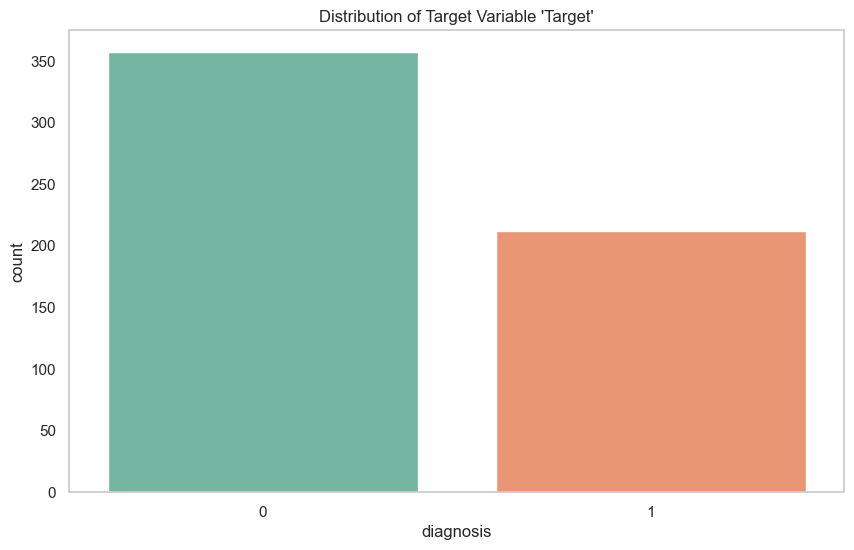

In [18]:
# Analysis of target variable 'Target'
print("\nDistribution of target variable 'Target':")
print(df['diagnosis'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title("Distribution of Target Variable 'Target'")
plt.grid(False)
plt.show()

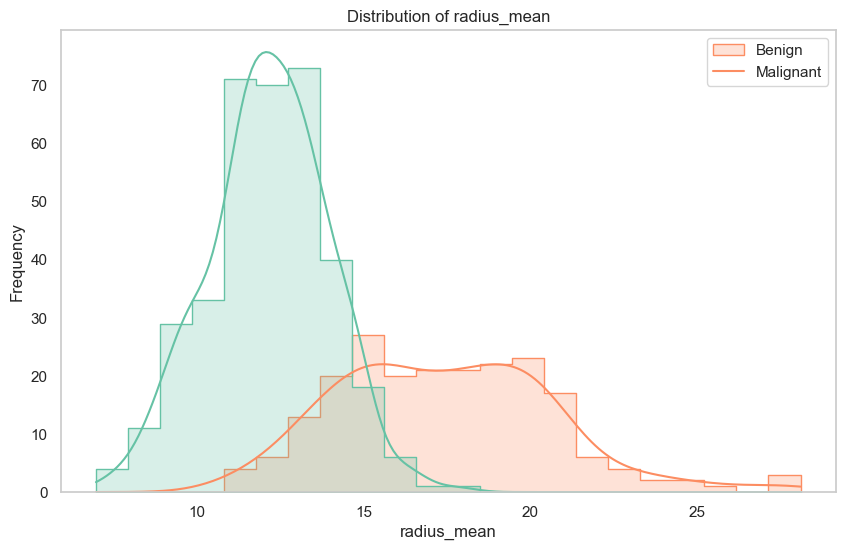

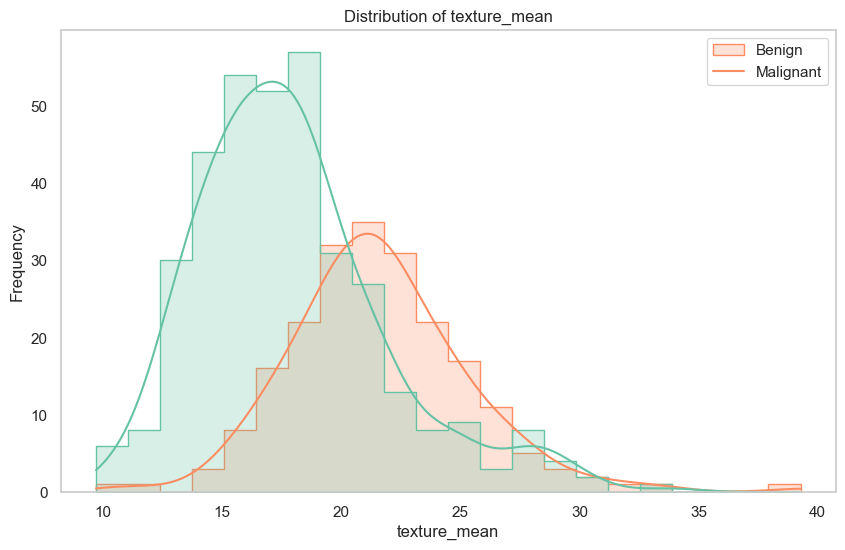

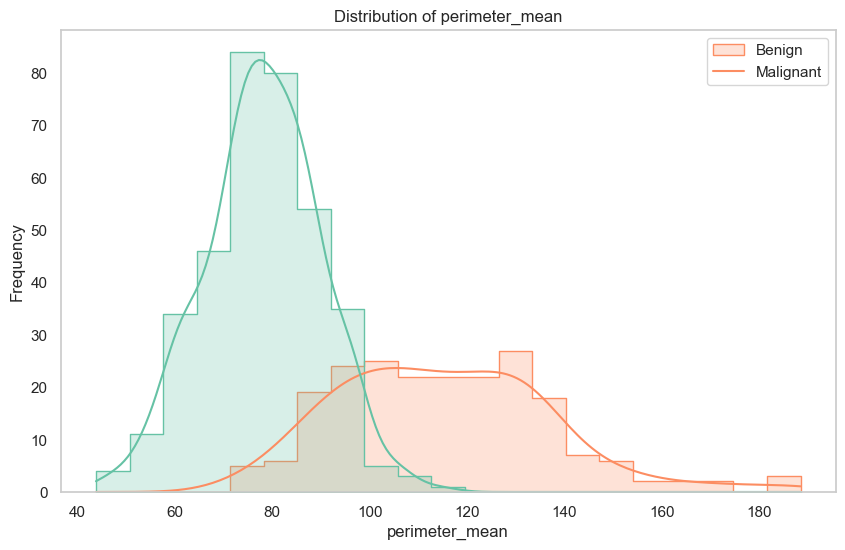

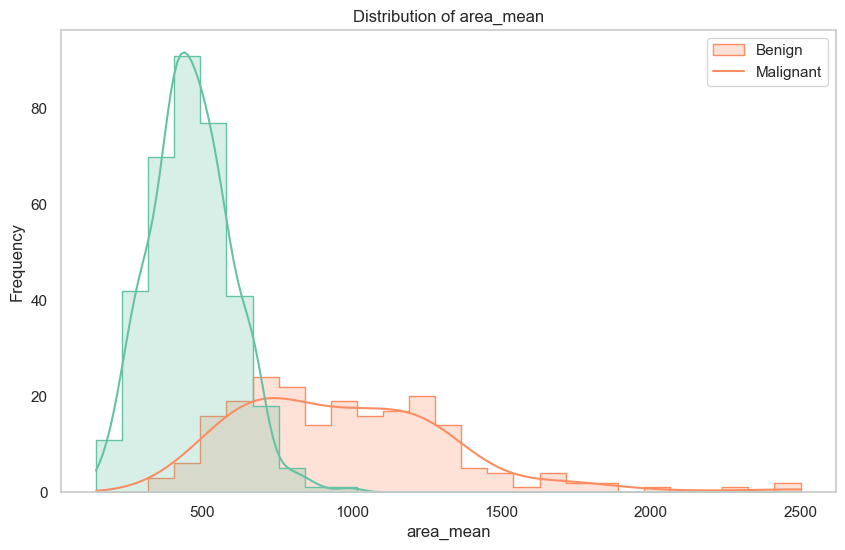

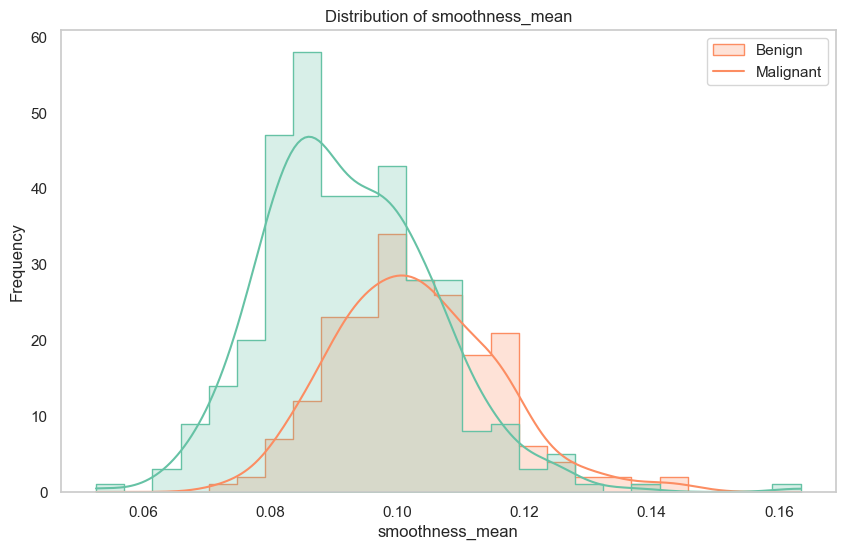

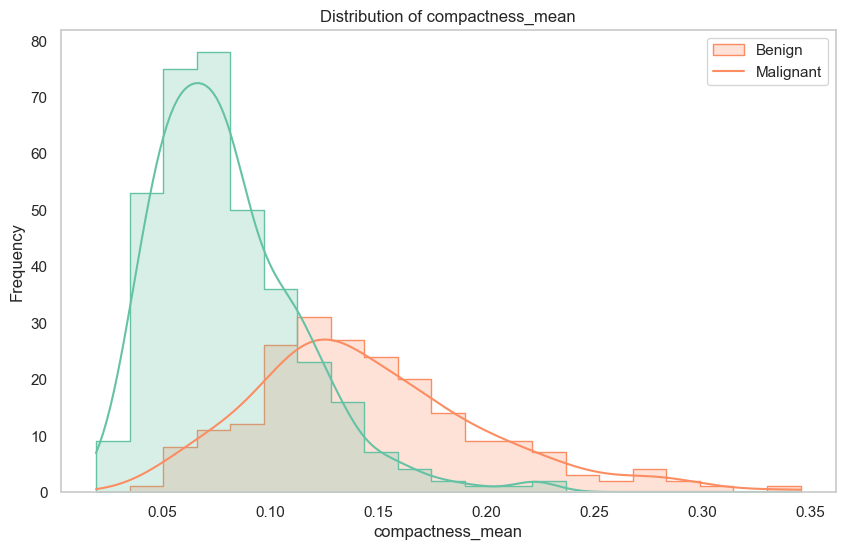

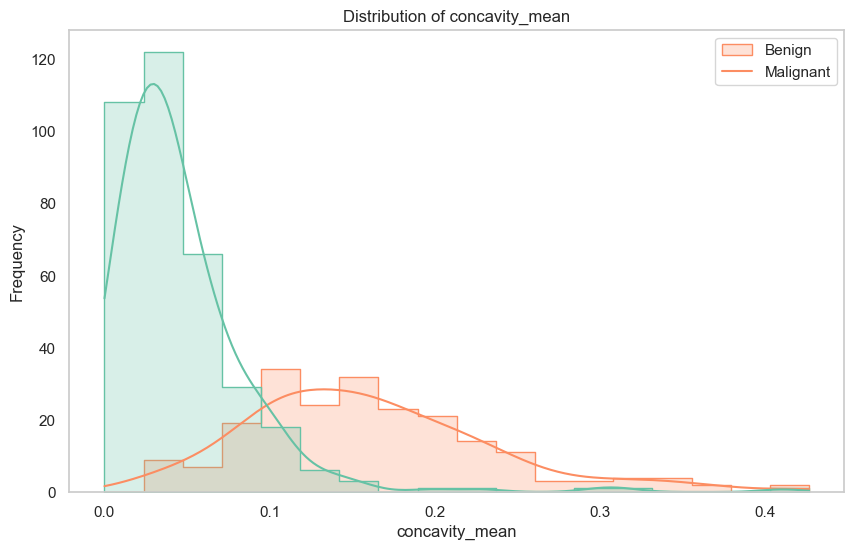

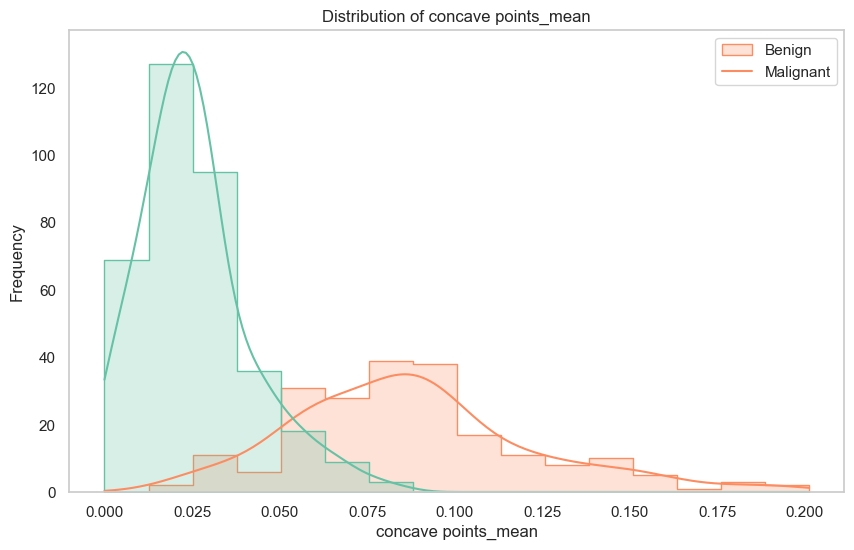

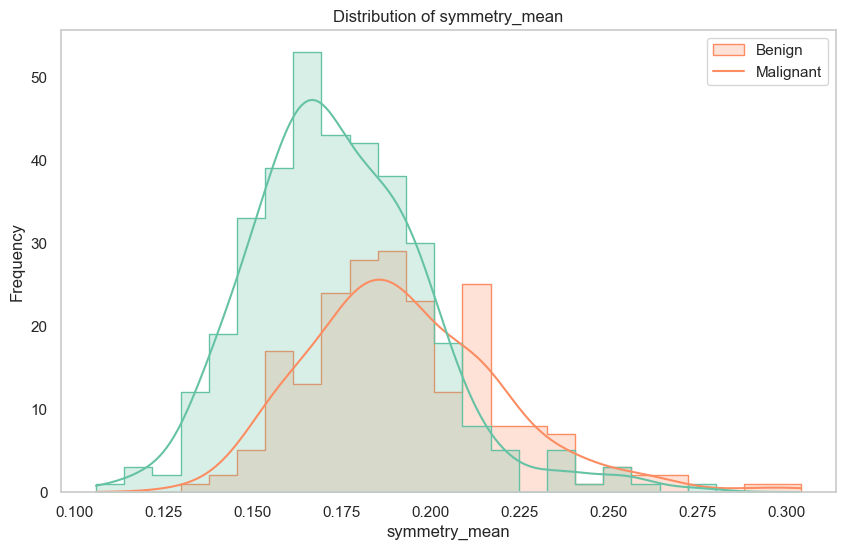

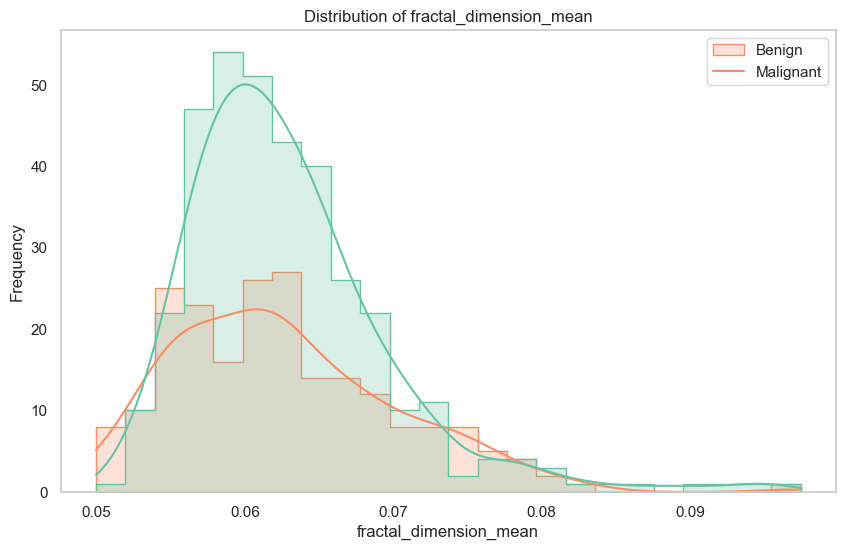

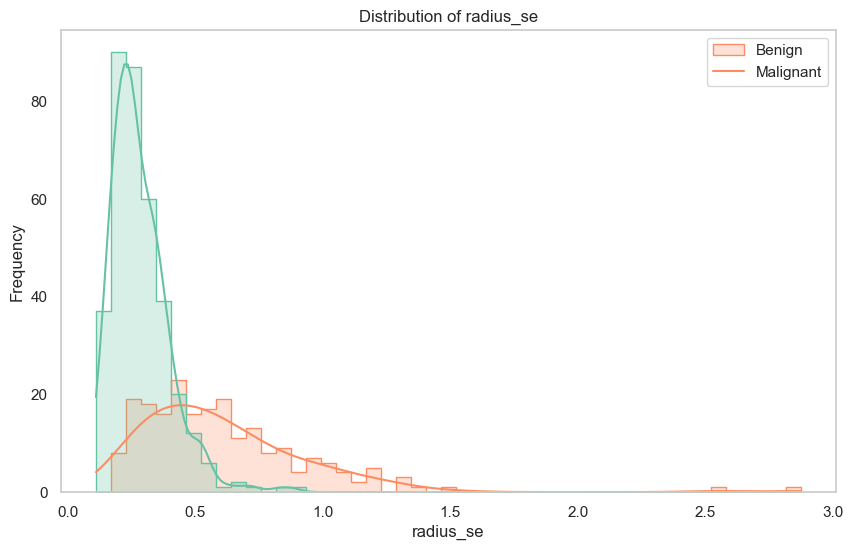

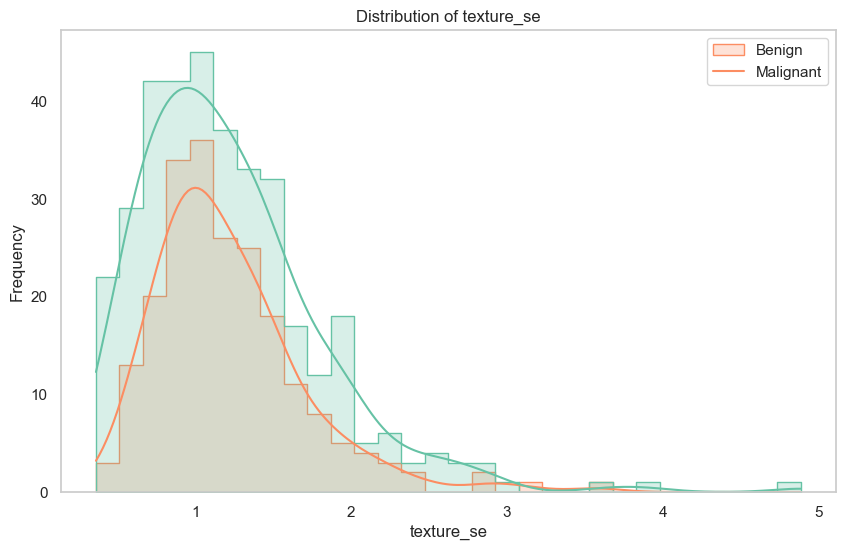

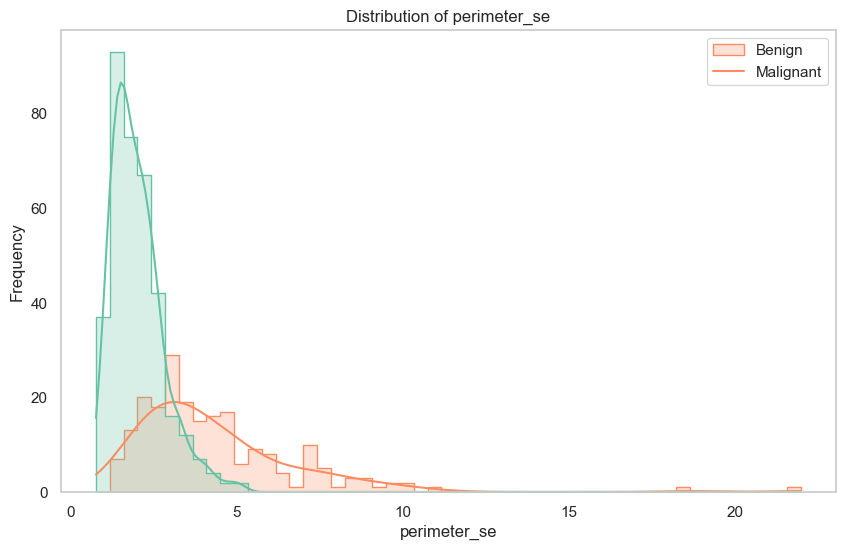

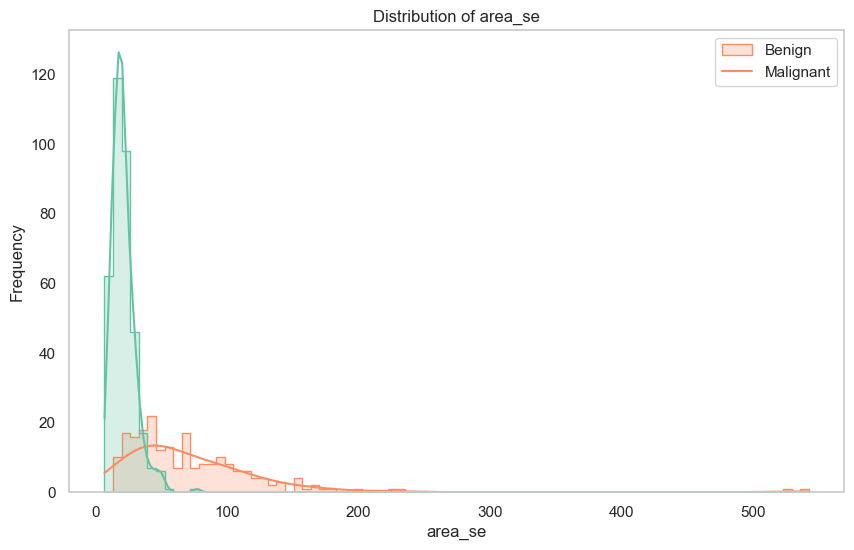

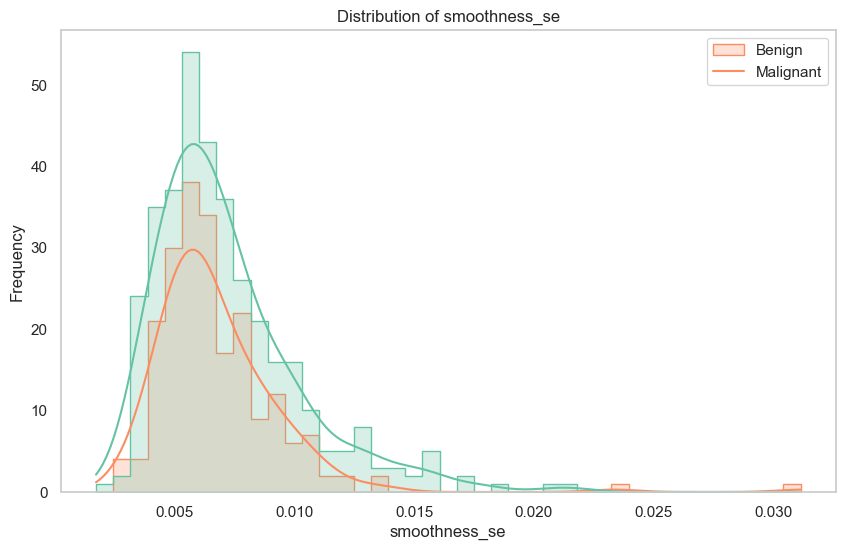

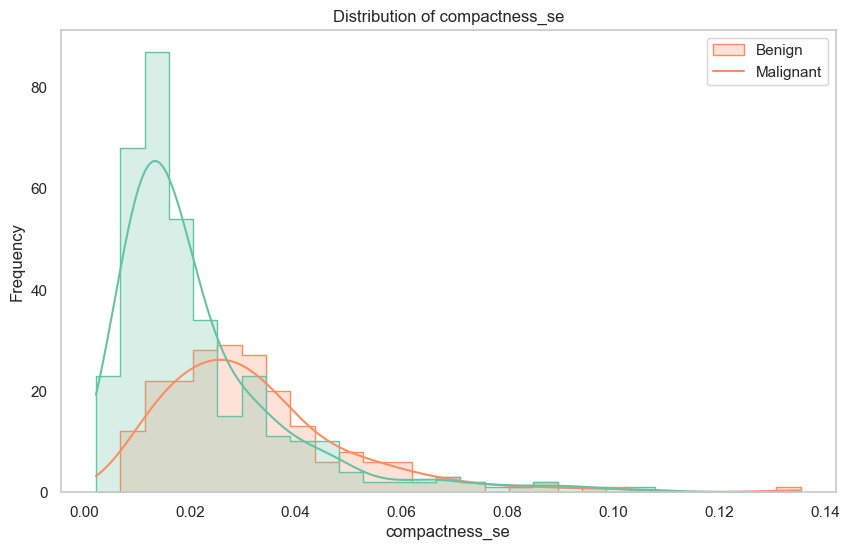

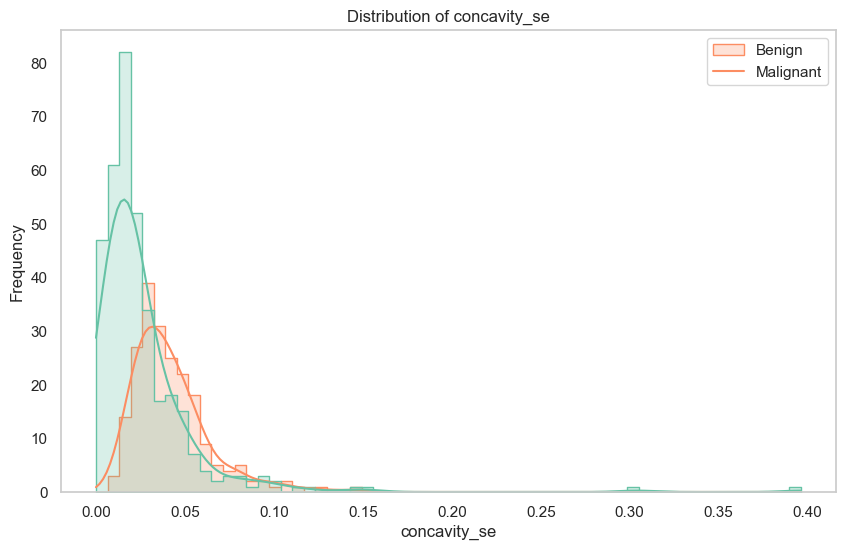

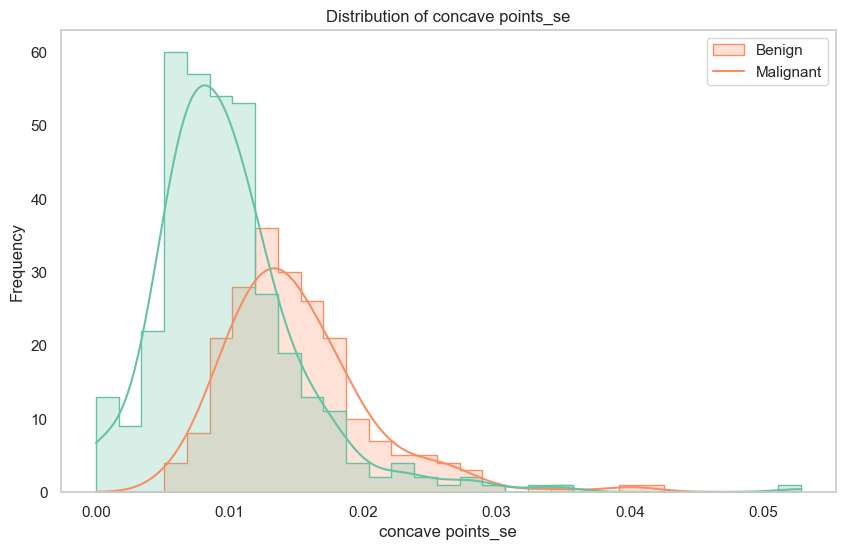

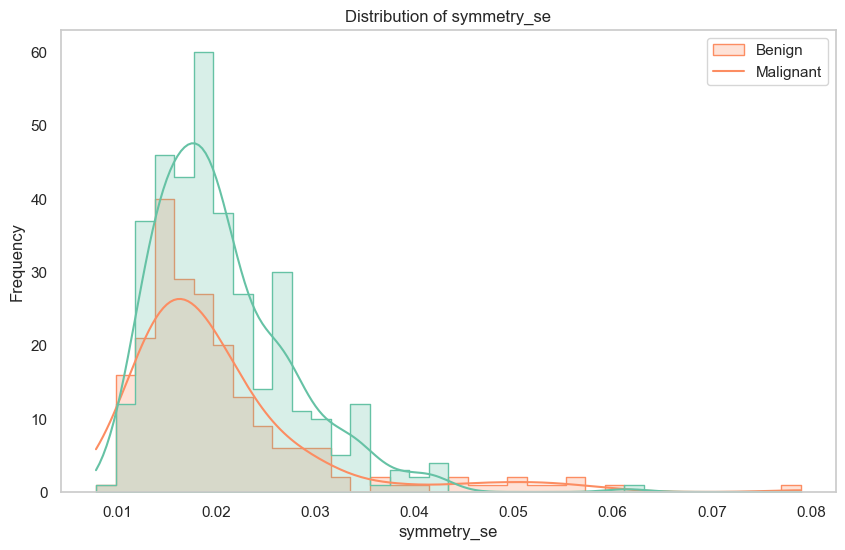

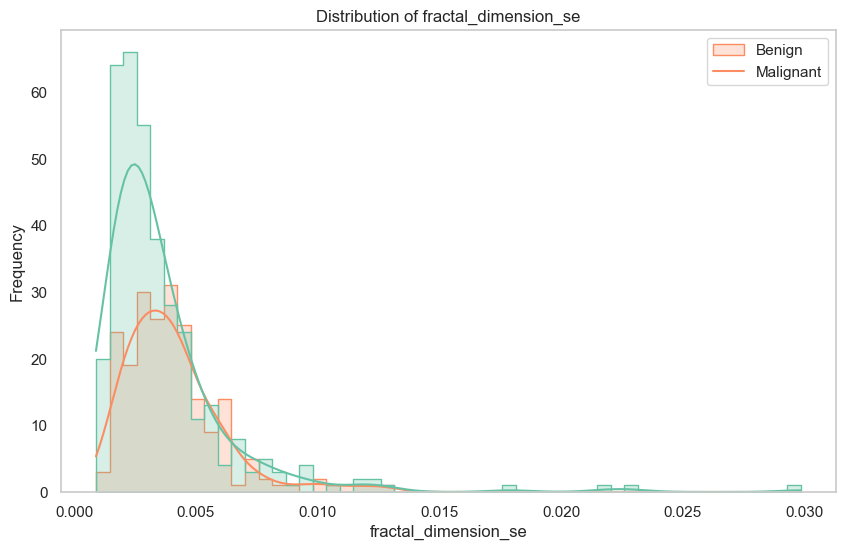

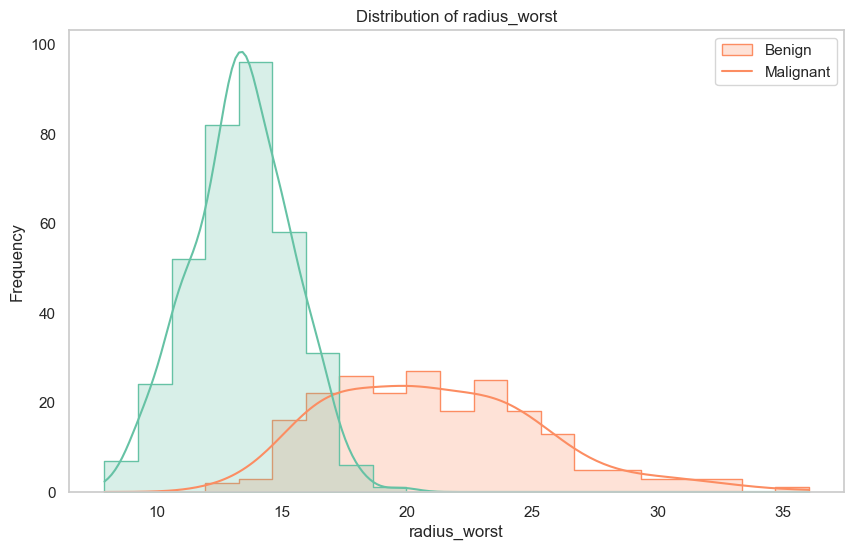

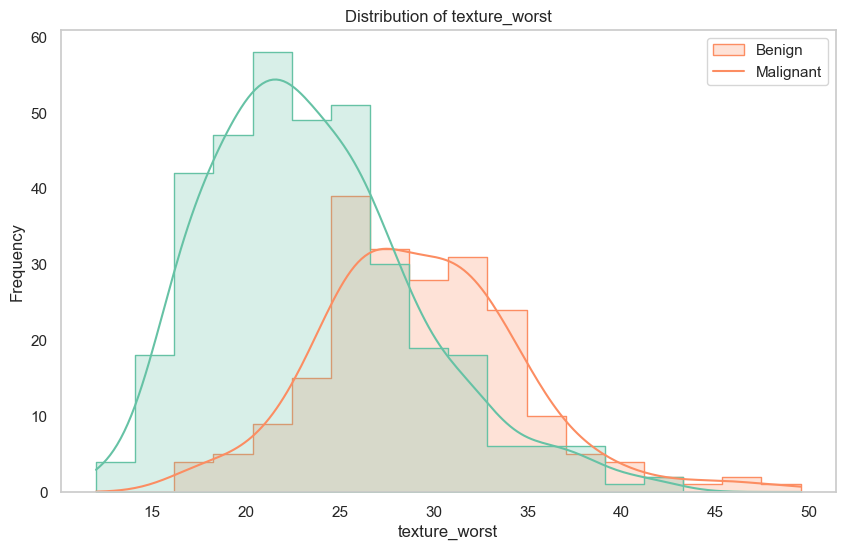

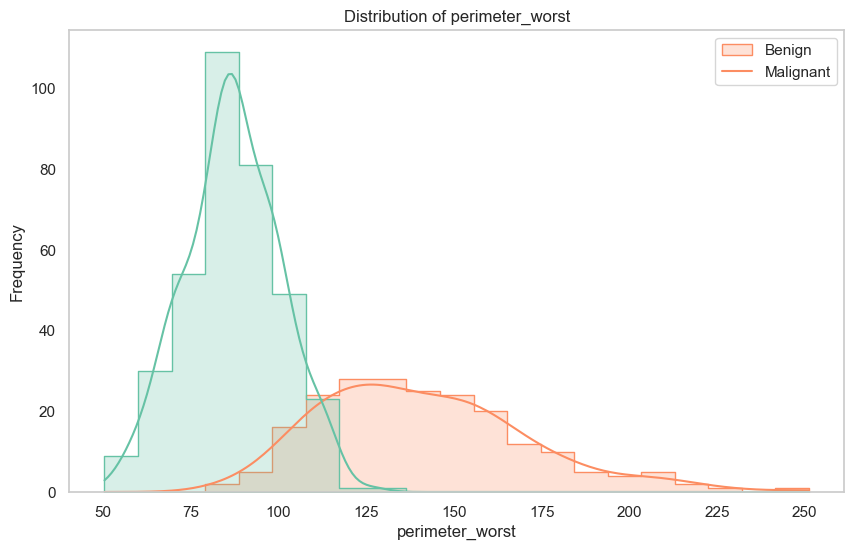

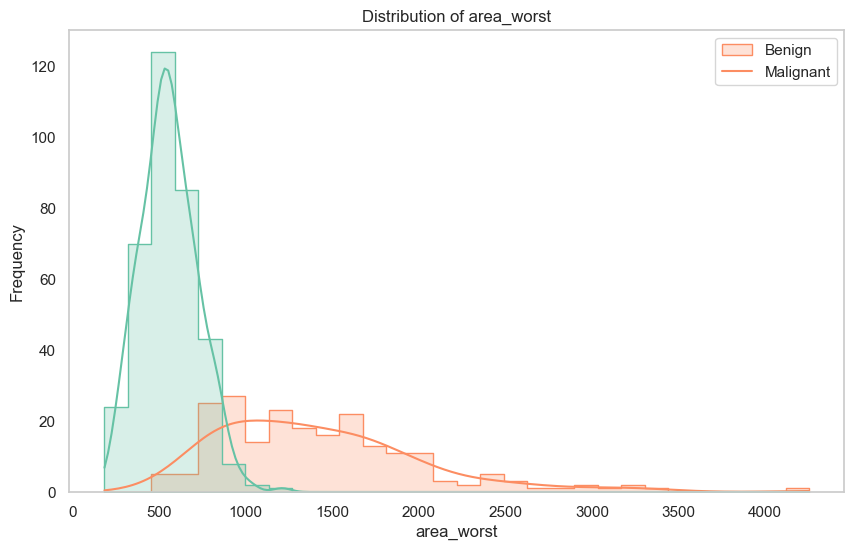

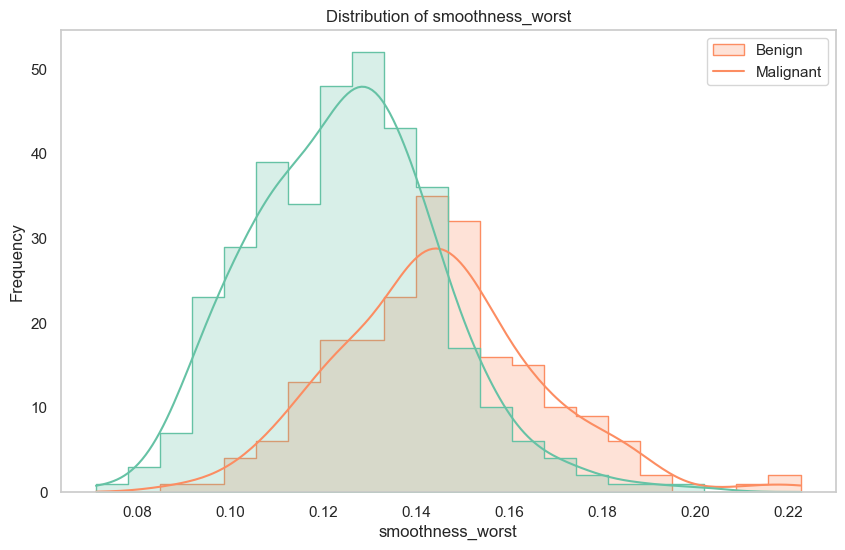

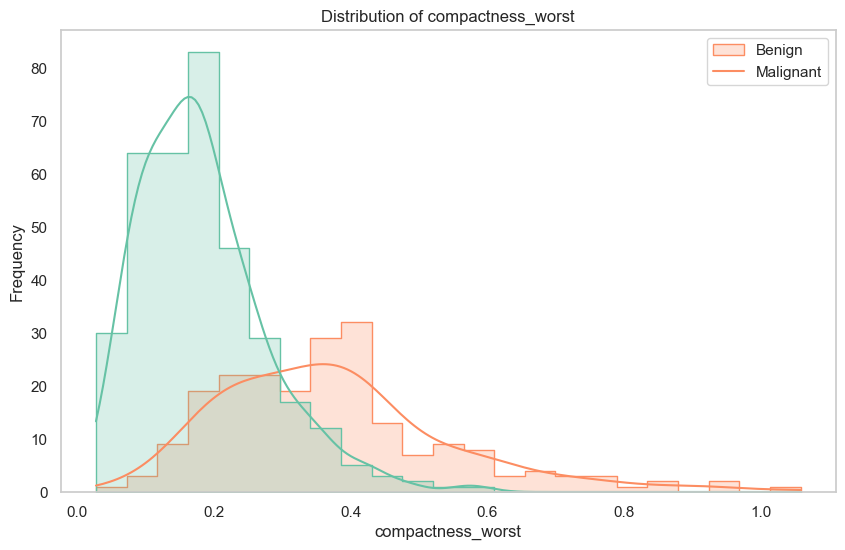

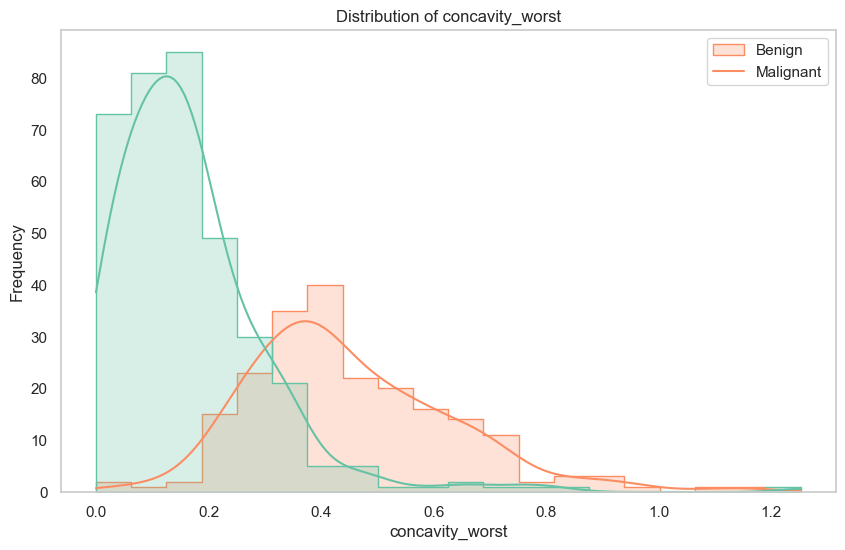

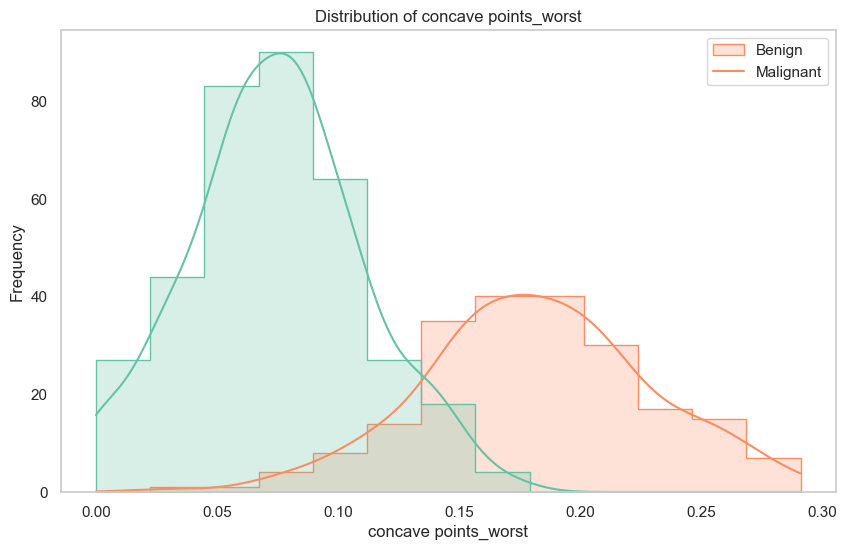

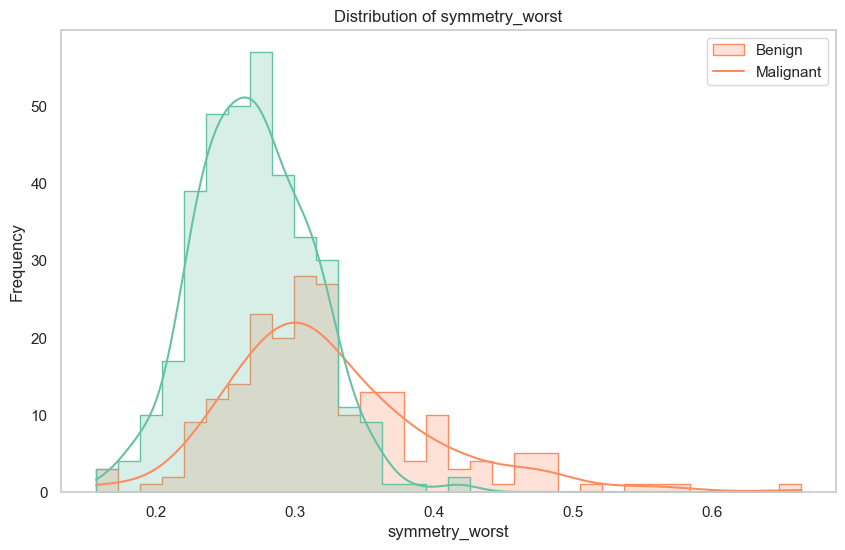

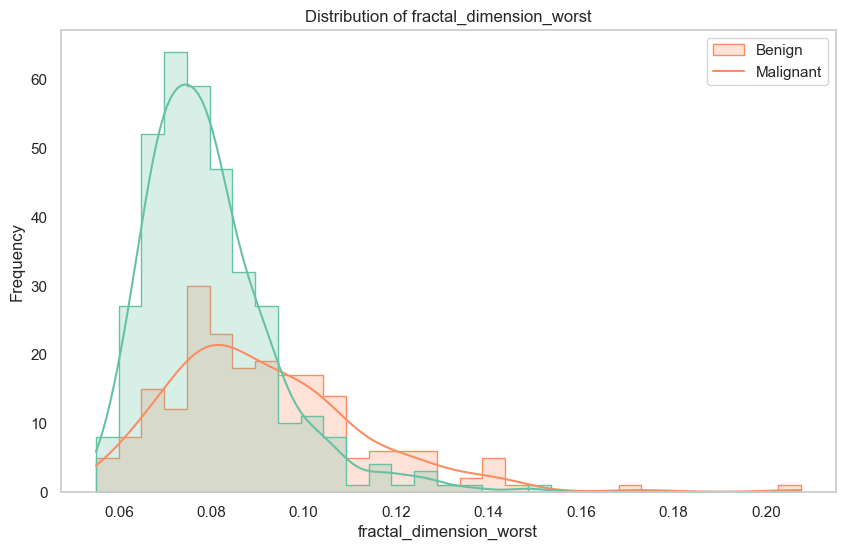

In [19]:
# List all features (excluding 'Diagnosis')
features = df.columns[1:]

# Create distribution plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x=feature, hue='diagnosis', kde=True, element='step', palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(['Benign', 'Malignant'])
    plt.grid(False)
plt.show()

**Analysis:** 
The provided code creates distribution plots for each feature in the dataset, comparing the distribution of benign and malignant samples. Here is a detailed explanation of what these plots represent and how to interpret the results:

### Distribution Plots Explained

1. **Purpose:**
- The purpose of these plots is to visualize the distribution of the different features in the dataset and how they vary between benign and malignant samples.

2. **Plot Creation:**
- The code iterates over all the features in the dataset (excluding 'Diagnosis') and creates distribution plots (`histplot`) for each of them.
- The plots are colored according to the diagnosis ('Benign' or 'Malignant') using the 'Set2' color palette.

3. **Plot Elements:**
- **Histogram:** Shows the distribution of the samples for the specific feature. - **KDE (Kernel Density Estimate):** A smoothing line that represents the distribution of the feature.
- **Colors:** Differentiate between benign and malignant samples.
- **Title:** Indicates which feature is being analyzed.
- **Axes:** The x-axis represents the feature values, while the y-axis represents the frequency of those values.
- **Legend:** Indicates which color represents each class (benign or malignant).

### Interpreting Graphs

1. **Overlap of Distributions:**
- If the distributions for the benign and malignant samples overlap significantly, this suggests that this feature may not be very useful in distinguishing between the two classes.
- If there is little overlap and the distributions are quite distinct, this suggests that this feature is a good discriminator between benign and malignant.

2. **Difference in Peaks:** - A plot where the peaks of the benign and malignant distributions are at different points on the x-axis suggests that the values ​​of that feature are different between the classes.

3. **Width of Distribution:** - The width of the distribution can indicate the variability of the feature values. Narrower distributions indicate less variability, while wider distributions indicate greater variability.

4. **Shape of Distribution:** - The shape of the distributions (symmetric, asymmetric, unimodal, bimodal) can provide insights into the nature of the data for each feature.

### Examples of Interpretation

1. **Radius_mean:** - If the `radius_mean` plot shows that malignant samples tend to have larger radius values ​​than benign samples, this suggests that `radius_mean` is a good feature for separating benign from malignant.

2. **Texture_mean:**
- If the `texture_mean` distributions for benign and malignant samples overlap, this feature may be less useful for classification.

3. **Area_mean:**
- If the `area_mean` distribution for malignant samples is concentrated at higher values ​​and for benign samples at lower values, this feature may be a good indicator of malignancy.

### Conclusion

The distribution plots created by the code provide a clear visualization of how features vary between benign and malignant samples. This helps identify which features are more discriminating for breast cancer diagnosis, which is essential for building effective machine learning models.

# 2.1 : Correlation analysis

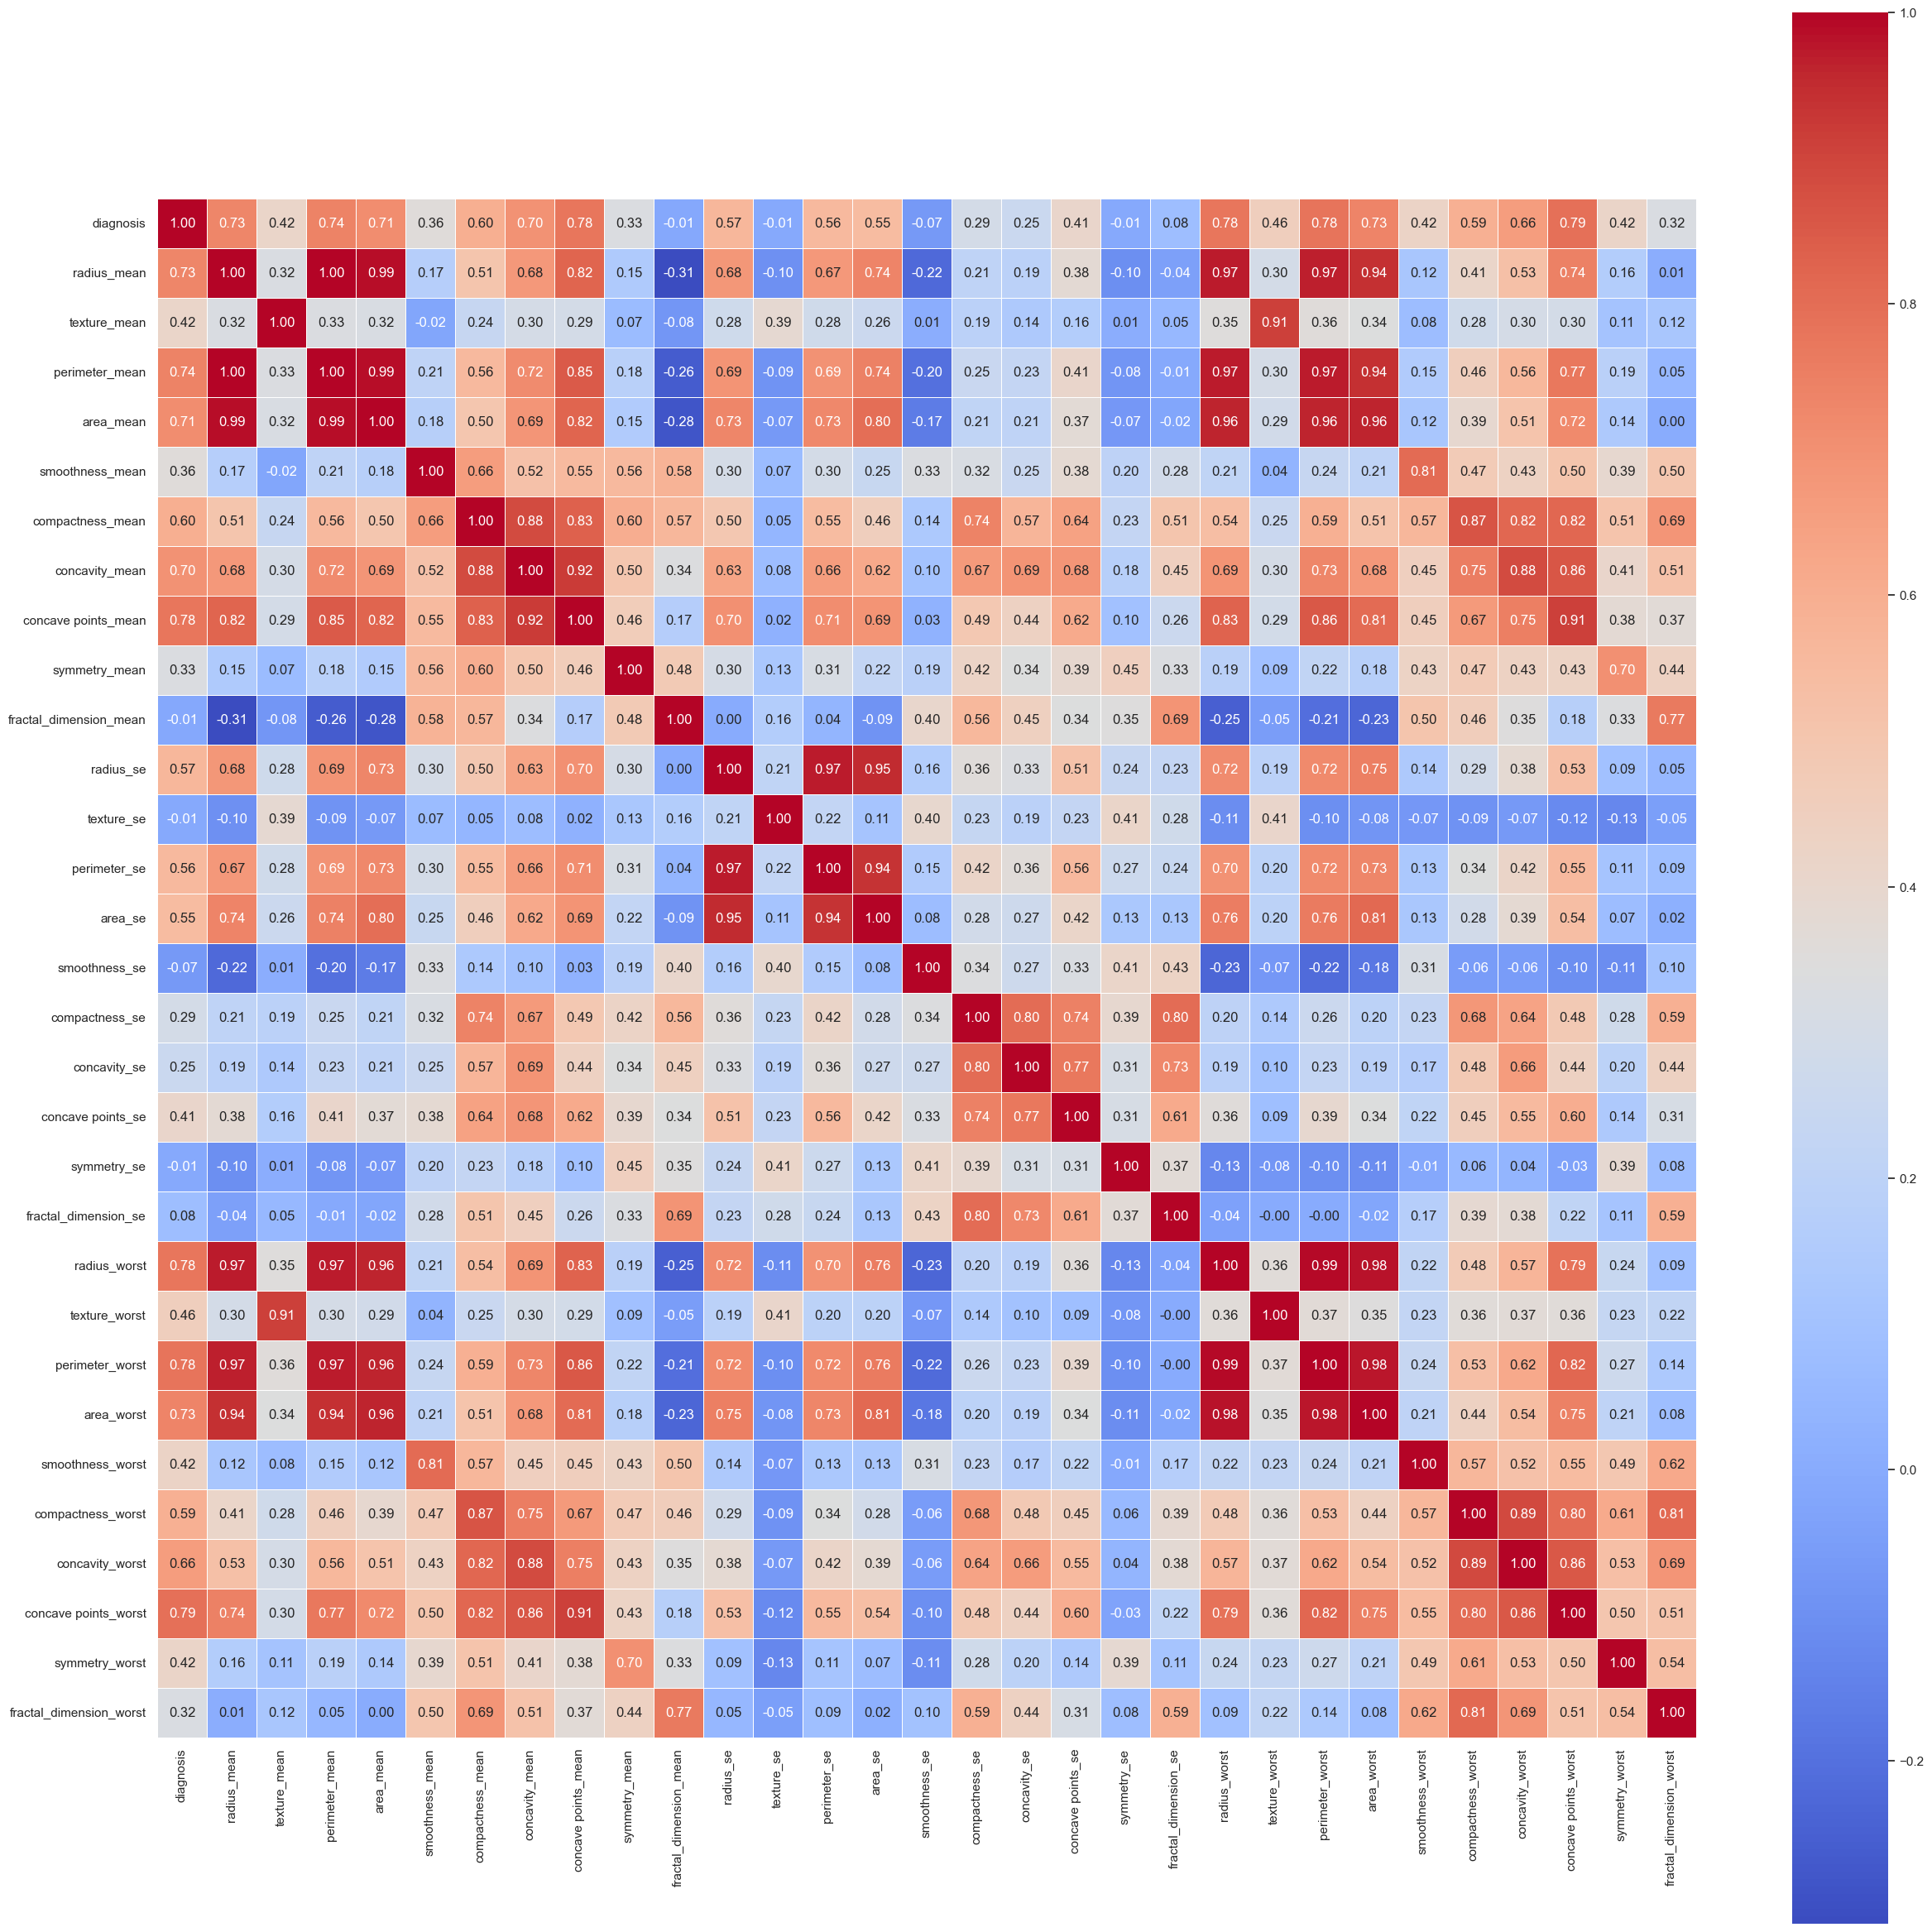

In [25]:
# 5. Correlation between variables
data_corr = df.corr()

f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

# Sets the output file name and format (PNG in the example)
output_file = "data_corr.png"
plt.savefig(output_file, format="png")

# Optional to show the graph on the screen
plt.show()

**Correlation analysis**

### Correlation Matrix Analysis

The provided correlation matrix shows the correlations between various features of the breast cancer diagnosis dataset and the diagnosis (benign or malignant). Let's analyze this matrix and highlight the most meaningful correlations for the business team.

### Understanding the Correlation Matrix

- **Correlation (r):** Measures the strength and direction of the linear relationship between two variables. Ranges from -1 to 1.
- **r = 1:** Perfect positive correlation.
- **r = -1:** Perfect negative correlation.
- **r = 0:** No linear correlation.

### Key Observations

1. **Correlation with Diagnosis (Malignant/Benign):**
- **Radius Mean (0.73):**
- Strong positive correlation. Tumors with higher `radius_mean` tend to be malignant.
- **Perimeter Mean (0.74):**
- Strong positive correlation. Tumors with higher `perimeter_mean` tend to be malignant.
- **Area Mean (0.73):**
- Strong positive correlation. Tumors with higher `area_mean` tend to be malignant.
- **Concavity Mean (0.71):**
- Strong positive correlation. Tumors with higher `concavity_mean` tend to be malignant.
- **Concave Points Mean (0.78):**
- Stronger positive correlation. Tumors with higher `concave points_mean` tend to be malignant.
- **Fractal Dimension Mean (0.48):**
- Moderate positive correlation.

2. **Internal Correlations Between Features:**
- **Radius Mean, Perimeter Mean, and Area Mean:**
- Almost perfect correlations (0.99). All of these features are strongly related to tumor size. - **Concavity Mean and Concave Points Mean:**
- Highly correlated (0.86). Features related to irregularity of tumor contours.
- **"Worst" Features:**
- `radius_worst`, `perimeter_worst`, and `area_worst` also show very strong correlations with each other.

3. **Negative Correlations:**
- **Smoothness Mean (-0.22):**
- Weaker negative correlation. Tumors with greater smoothness tend to be benign.

### Business Implications

1. **Importance of Features:**
- Features such as `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean`, and `concave points_mean` are highly indicative of malignancy and should be prioritized in breast cancer diagnostic models.

2. **Variable Redundancy:**
- Due to the near-perfect correlations between `radius_mean`, `perimeter_mean`, and `area_mean`, one may consider dimensionality reduction or selecting one of these features to simplify the model without losing too much information.

3. **Worst Feature Analysis:**
- Features such as `radius_worst`, `perimeter_worst`, and `area_worst` are also very relevant and should be included to capture the extremes of the features, which are critical for diagnosis.

4. **Model Improvement:**
- Using machine learning techniques that can take advantage of these internal correlations, such as decision trees and random forests, can improve diagnostic accuracy.

5. **Clinical Decisions:**
- Features highly correlated with malignancy should be closely monitored in routine examinations. Patients with high values ​​in these features may be prioritized for additional testing.

### Conclusion

The correlation matrix provides valuable insights into which features are most relevant for distinguishing between benign and malignant tumors. This information is crucial for building effective diagnostic models and making informed clinical decisions. By focusing on the features most correlated with malignancy and considering variable redundancy, we can improve the accuracy and efficiency of breast cancer diagnoses.

# 3 - Data cleaning

In [27]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(df.isnull().sum())

Number of missing values ​​per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [31]:
# There are no missing values in the dataset
# If there were missing values, we can fill them with the mean, median or mode depending on the type of variable
# Fill in missing values with the median for numeric variables


# 4 : Feature engineering

In [32]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()

# Aplicando nas colunas transformando em númericas
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Viewing
label_encoder

LabelEncoder()

In [33]:
# Viewing 
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 5 : Splitting the data in to features and targets

In [34]:
# Resources
X = df.drop(columns=['diagnosis'])

# Target variable
y = df['diagnosis']

In [35]:
# Visualizing data x
X.shape

(569, 30)

In [36]:
# Viewing y data
y.shape

(569,)

Here, we performed the division of the variables into features and the target variable. First, we separated the independent variables, which are the features used for predictive modeling. These features are the input data that the model will use to learn patterns and make predictions. Next, we isolated the dependent variable, or the target variable, which is the value we aim to predict. This process is crucial for building and training the model, ensuring that the features are correctly identified and that the model can learn the relationship between these features and the target variable. By properly dividing the data, we enhance the model's ability to accurately predict outcomes based on the given inputs

# Part 7 – Model Training

In [37]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (455, 30)
Viewing rows and columns given y train (455,)


Here, we conducted the training of the model using a train-test split. We adopted an 80/20 division, where 80% of the data was used for training and the remaining 20% was reserved for testing. This procedure is crucial for accurately evaluating the model's performance. The training set allows the model to learn patterns and relationships within the data, while the test set, which the model has not seen during training, is used to validate its ability to generalize and predict new data. Additionally, this approach helps identify and mitigate issues such as overfitting, ensuring that the model not only memorizes the training data but also performs well on unseen data.

# Section - Apply Machine learning Using Logistic Regression for classification

In [40]:
# Importing libraries
from sklearn.linear_model import LogisticRegression

# Models to be evaluated
model = LogisticRegression(random_state=50)

# Evaluate each model
model.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9428571428571428
Testing Accuracy: 0.956140350877193


In [42]:
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Generate rating report
report = classification_report(y_test, model.predict(X_test))
print()
print("Classification Report:")
print()
print(report)
print()


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




### ----------Summary----------

- **Training Accuracy:** 0.9451
- **Testing Accuracy:** 0.9649
- **Observations:**
- Good balance between training and testing performance.
- Indicates good generalization ability with lower risk of overfitting.
